<a href="https://colab.research.google.com/github/boufik/Google-Colab-Projects/blob/main/TitforTat_in_Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
def determine_winner(move1, move2):
    if move1 == move2:
        return 'Tie'
    if move1 == 'Rock':
        return 1 if move2 == 'Scissors' else 2
    if move1 == 'Paper':
        return 1 if move2 == 'Rock' else 2
    if move1 == 'Scissors':
        return 1 if move2 == 'Paper' else 2

In [6]:
moves_ALL = ['Rock', 'Paper', 'Scissors']
for move1 in moves_ALL:
    for move2 in moves_ALL:
        print(f"Player 1 vs Player 2\n{move1} vs {move2}")
        winner = determine_winner(move1, move2)
        if winner == 'Tie':
            print("It is a tie!\n")
        else:
            print(f"Player {winner} wins!\n")

Player 1 vs Player 2
Rock vs Rock
It is a tie!

Player 1 vs Player 2
Rock vs Paper
Player 2 wins!

Player 1 vs Player 2
Rock vs Scissors
Player 1 wins!

Player 1 vs Player 2
Paper vs Rock
Player 1 wins!

Player 1 vs Player 2
Paper vs Paper
It is a tie!

Player 1 vs Player 2
Paper vs Scissors
Player 2 wins!

Player 1 vs Player 2
Scissors vs Rock
Player 2 wins!

Player 1 vs Player 2
Scissors vs Paper
Player 1 wins!

Player 1 vs Player 2
Scissors vs Scissors
It is a tie!



# Strategies

In [7]:
def random_strategy(round, opponent_moves):
    # Random strategy
    return np.random.choice(['Rock', 'Paper', 'Scissors'], p=[1/3, 1/3, 1/3])

def tit_for_tat(round, opponent_moves):
    # From round 2, it copies its opponent's decision in the last move
    if round == 1:
        return 'Scissors'
    else:
        return opponent_moves[-1]

# One Game

In [8]:
def simulate(ROUNDS, strategy1, strategy2, verbose=False, stats=False):
    wins1 = 0
    wins2 = 0
    ties = 0
    moves1 = []
    moves2 = []
    for round in range(1, ROUNDS + 1):
        wins1_initial = wins1
        wins2_initial = wins2
        move1 = strategy1(round, moves2)
        move2 = strategy2(round, moves1)
        moves1.append(move1)
        moves2.append(move2)
        winner = determine_winner(move1, move2)
        if winner == 'Tie':
            ties += 1
        else:
            wins1 += 1 if winner == 1 else 0
            wins2 += 1 if winner == 2 else 0
        if verbose:
            print(f"----> Round {round}")
            print(f"Player 1 plays: {move1}\nPlayer 2 plays: {move2}")
            if winner == 'Tie':
                print(f"It is a tie!\nScore: {wins1} - {wins2}\n")
            else:
                print(f"Player {winner} wins!\nScore: {wins1} - {wins2}\n")
    if stats:
        print(f"{34 * '~'}\n{strategy1.__name__} vs {strategy2.__name__}")
        print(f"Rounds = {ROUNDS}\nWins1 = {wins1}\nWins2 = {wins2}\nTies = {ties}\n{34 * '~'}\n")
    return wins1, wins2, ties

wins1, wins2, ties = simulate(10, random_strategy, tit_for_tat, verbose=True, stats=True)

----> Round 1
Player 1 plays: Paper
Player 2 plays: Scissors
Player 2 wins!
Score: 0 - 1

----> Round 2
Player 1 plays: Paper
Player 2 plays: Paper
It is a tie!
Score: 0 - 1

----> Round 3
Player 1 plays: Scissors
Player 2 plays: Paper
Player 1 wins!
Score: 1 - 1

----> Round 4
Player 1 plays: Rock
Player 2 plays: Scissors
Player 1 wins!
Score: 2 - 1

----> Round 5
Player 1 plays: Rock
Player 2 plays: Rock
It is a tie!
Score: 2 - 1

----> Round 6
Player 1 plays: Paper
Player 2 plays: Rock
Player 1 wins!
Score: 3 - 1

----> Round 7
Player 1 plays: Paper
Player 2 plays: Paper
It is a tie!
Score: 3 - 1

----> Round 8
Player 1 plays: Paper
Player 2 plays: Paper
It is a tie!
Score: 3 - 1

----> Round 9
Player 1 plays: Scissors
Player 2 plays: Paper
Player 1 wins!
Score: 4 - 1

----> Round 10
Player 1 plays: Rock
Player 2 plays: Scissors
Player 1 wins!
Score: 5 - 1

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
random_strategy vs tit_for_tat
Rounds = 10
Wins1 = 5
Wins2 = 1
Ties = 4
~~~~~~~~~~~~~~~~~~~~

# Two Games

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
random_strategy vs random_strategy
Rounds = 30000
Wins1 = 9982
Wins2 = 10014
Ties = 10004
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



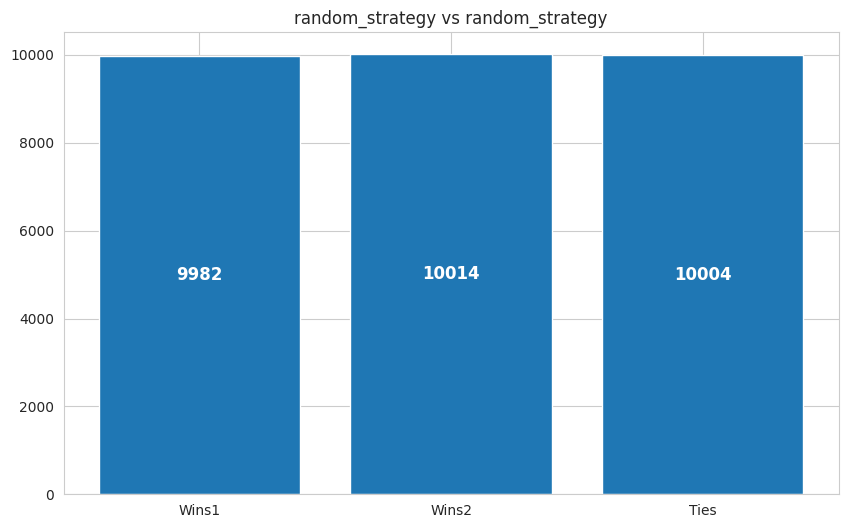



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
random_strategy vs tit_for_tat
Rounds = 30000
Wins1 = 10136
Wins2 = 10024
Ties = 9840
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



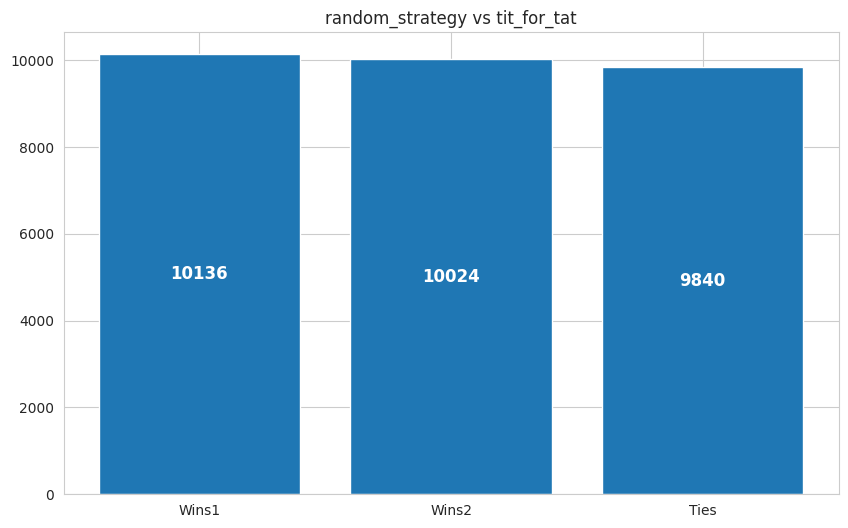

In [10]:
def print_bars(fig, BAR):
    for bar in BAR:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        y = height / 2
        plt.text(x, y, f'{int(height)}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

def play_two_games(ROUNDS, strategies1, strategies2, verbose=False, stats=False, visualize=False):
    LEN = len(strategies1) if len(strategies1) == len(strategies2) else 0
    for index in range(LEN):
        strategy1 = strategies1[index]
        strategy2 = strategies2[index]
        wins1, wins2, ties = simulate(SIMS, strategy1, strategy2, verbose=False, stats=True)
        if visualize:
            fig = plt.figure(figsize=(10, 6))
            x = [0, 1, 2]
            y = [wins1, wins2, ties]
            BAR = plt.bar(x, y)
            plt.xticks(x, ['Wins1', 'Wins2', 'Ties'])
            plt.title(f"{strategy1.__name__} vs {strategy2.__name__}")
            print_bars(fig, BAR)
            plt.show()
            print("\n")

# Player 1 plays always randomly, while Player 2 plays randomly only in the first game
# Player 2 plays TitForTat in the second game
strategies1 = [random_strategy, random_strategy]
strategies2 = [random_strategy, tit_for_tat]
SIMS = 3 * 10**4
play_two_games(10, strategies1, strategies2, verbose=False, stats=True, visualize=True)